In [127]:
import numpy as np
import pandas as pd
import os
import matplotlib as mpl
import json
import matplotlib.pyplot as plt
# plt.close("all")
# plt.rcParams.update({"mathtext.default": "regular"})
# plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams["figure.dpi"] = 300
# Default settings
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use("seaborn-darkgrid")

C:\Users\dicky1031\AppData\Local\Temp\ipykernel_6264\3531755386.py:13: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


In [128]:
def get_peak_final(data):
    '''
    Detect peak (rmax and rmin) position in invivo-signal

    '''
    max_idx_set = []
    min_idx_set = []
    data_mean = data.mean()
    
    idx = 0
    break_out_flag = False
    state = data[idx] < data_mean  
    while (data[idx] < data_mean) == state:
        idx += 1
    idx_s = idx
    while True:
        
        state = data[idx] < data_mean
        # while ((data[idx-1] < data_mean) != state) | ((data[idx] < data_mean) == state) | (idx-idx_s <= 3):
        while ((data[idx] < data_mean) == state) | (idx-idx_s <= 3):
        # while (data[idx] < data_mean) == state:
            idx += 1
            if idx >= len(data):
                break_out_flag = True
                break
        if break_out_flag:
            break
        idx_e = idx
        
        minimum_interval = 6
        data_local = data[idx_s:idx_e]
        if data_local.mean() > data_mean:
            max_idx = idx_s + np.argmax(data_local)
            if len(max_idx_set) == 0:
                max_idx_set.append(max_idx)
            elif max_idx - max_idx_set[-1] >= minimum_interval:
                max_idx_set.append(max_idx)
        if data_local.mean() <= data_mean:
            min_idx = idx_s + np.argmin(data_local)
            if len(min_idx_set) == 0:
                min_idx_set.append(min_idx)
            elif min_idx - min_idx_set[-1] >= minimum_interval:
                min_idx_set.append(min_idx)
        
        idx_s = idx_e
    
    max_idx_set, min_idx_set = np.array(max_idx_set), np.array(min_idx_set)    
    
    # # remove improper peak idx
    # data_std = data.std(ddof=1)    
    # max_idx_set = max_idx_set[abs(data[max_idx_set] - data_mean) > (0.5*data_std)]
    # min_idx_set = min_idx_set[abs(data[min_idx_set] - data_mean) > (0.5*data_std)]
    
    # fine-tuning
    for _ in range(5):
        for idx, max_idx in enumerate(max_idx_set):
            start = 0 if max_idx-(minimum_interval-1) < 0 else max_idx-(minimum_interval-1)
            end = max_idx+minimum_interval
            # print((start, end))
            tmp_idx = np.argmax(data[start:end])
            max_idx = start + tmp_idx
            max_idx_set[idx] = max_idx
        for idx, min_idx in enumerate(min_idx_set):
            start = 0 if min_idx-(minimum_interval-1) < 0 else min_idx-(minimum_interval-1)
            end = min_idx+minimum_interval
            # print((start, end))
            tmp_idx = np.argmin(data[start:end])
            min_idx = start + tmp_idx
            min_idx_set[idx] = min_idx
    
    # remove improper peak idx
    cutbackforthpercent = 0.1
    max_cutnum = round(len(max_idx_set)*cutbackforthpercent)
    min_cutnum = round(len(min_idx_set)*cutbackforthpercent)
    data_max, data_min = data[max_idx_set], data[min_idx_set]
    sort_max, sort_min = np.argsort(data_max), np.argsort(data_min)
    max_idx_set = max_idx_set[sort_max][max_cutnum:-max_cutnum]
    min_idx_set = min_idx_set[sort_min][min_cutnum:-min_cutnum]
    max_idx_set.sort()
    min_idx_set.sort()
    
    return np.unique(max_idx_set), np.unique(min_idx_set)

In [129]:
date = "20230812"
SDS1_time_resolution = 0.10129 # [sec/point]
SDS2_time_resolution = 0.1 # [sec/point]
baseline_end = 60 # [sec]
HP_end = 240 #[sec]
recovery_end = 840 #[sec]

In [130]:
data = pd.read_csv(os.path.join("dataset", "SDS1", date, 'in_vivo_result.csv')) # wl resolution = 0.171 nm, time resolution =  secs
np_data = data.to_numpy()[:,2:]
used_wl = [float(k.split('nm')[0]) for k in data.keys().to_list()[2:]]
mean_of_wl = data.to_numpy().mean(1)
max_id = np.where(data['peak']==1)[0]
min_id = np.where(data['peak']==-1)[0]
# max_id, min_id = get_peak_final(data=mean_of_wl)

In [131]:
data2 = pd.read_csv(os.path.join("dataset", "SDS2", date, 'in_vivo_result.csv')) # wl resolution = 0.171 nm, time resolution = 0.1 secs
np_data2 = data2.to_numpy()[:,2:]
used_wl2 = [float(k.split('nm')[0]) for k in data2.keys().to_list()[2:]]
mean_of_wl2 = data2.to_numpy().mean(1)
max_id2 = np.where(data2['peak']==1)[0]
min_id2 = np.where(data2['peak']==-1)[0]
# max_id2, min_id2 = get_peak_final(data=mean_of_wl2)

In [132]:
max_id2

array([   7,   18,   28,   38,   48,   59,   69,   79,   88,   99,  108,
        118,  128,  138,  148,  160,  168,  179,  190,  200,  210,  220,
        232,  240,  251,  261,  272,  282,  293,  302,  332,  343,  354,
        363,  375,  384,  394,  405,  415,  425,  435,  445,  455,  466,
        476,  486,  496,  506,  516,  526,  535,  546,  556,  566,  576,
        588,  606,  617,  626,  635,  646,  655,  664,  674,  685,  695,
        708,  718,  727,  737,  747,  757,  767,  776,  786,  795,  805,
        815,  846,  859,  868,  877,  885,  895,  908,  918,  927,  937,
        946,  955,  967,  978,  986,  995, 1007, 1016, 1026, 1035, 1045,
       1057, 1068, 1077, 1086, 1095, 1106, 1118, 1126, 1136, 1145, 1157,
       1166, 1177, 1186, 1196, 1205, 1217, 1231, 1237, 1246, 1256, 1265,
       1277, 1286, 1296, 1305, 1315, 1327, 1335, 1346, 1355, 1365, 1377,
       1386, 1397, 1406, 1416, 1427, 1436, 1447, 1457, 1465, 1477, 1488,
       1496, 1506, 1515, 1526, 1537, 1545, 1555, 15

In [133]:
min_id2

array([  12,   21,   34,   42,   52,   62,   72,   82,   92,  103,  113,
        121,  131,  142,  152,  162,  171,  182,  193,  203,  216,  224,
        234,  244,  254,  265,  275,  288,  304,  315,  325,  335,  346,
        357,  367,  378,  387,  398,  408,  418,  428,  440,  448,  458,
        469,  481,  489,  500,  509,  521,  529,  539,  549,  559,  570,
        583,  609,  620,  629,  642,  652,  661,  670,  680,  690,  703,
        713,  722,  732,  741,  752,  763,  772,  780,  793,  802,  812,
        821,  830,  844,  854,  863,  872,  881,  892,  901,  912,  924,
        933,  941,  950,  961,  972,  982,  990, 1001, 1011, 1022, 1031,
       1041, 1051, 1063, 1072, 1081, 1092, 1100, 1110, 1122, 1131, 1142,
       1150, 1161, 1172, 1181, 1190, 1201, 1210, 1223, 1233, 1241, 1250,
       1261, 1270, 1280, 1292, 1300, 1311, 1320, 1330, 1342, 1351, 1362,
       1371, 1381, 1390, 1401, 1410, 1421, 1429, 1442, 1451, 1462, 1470,
       1480, 1492, 1500, 1511, 1521, 1532, 1540, 15

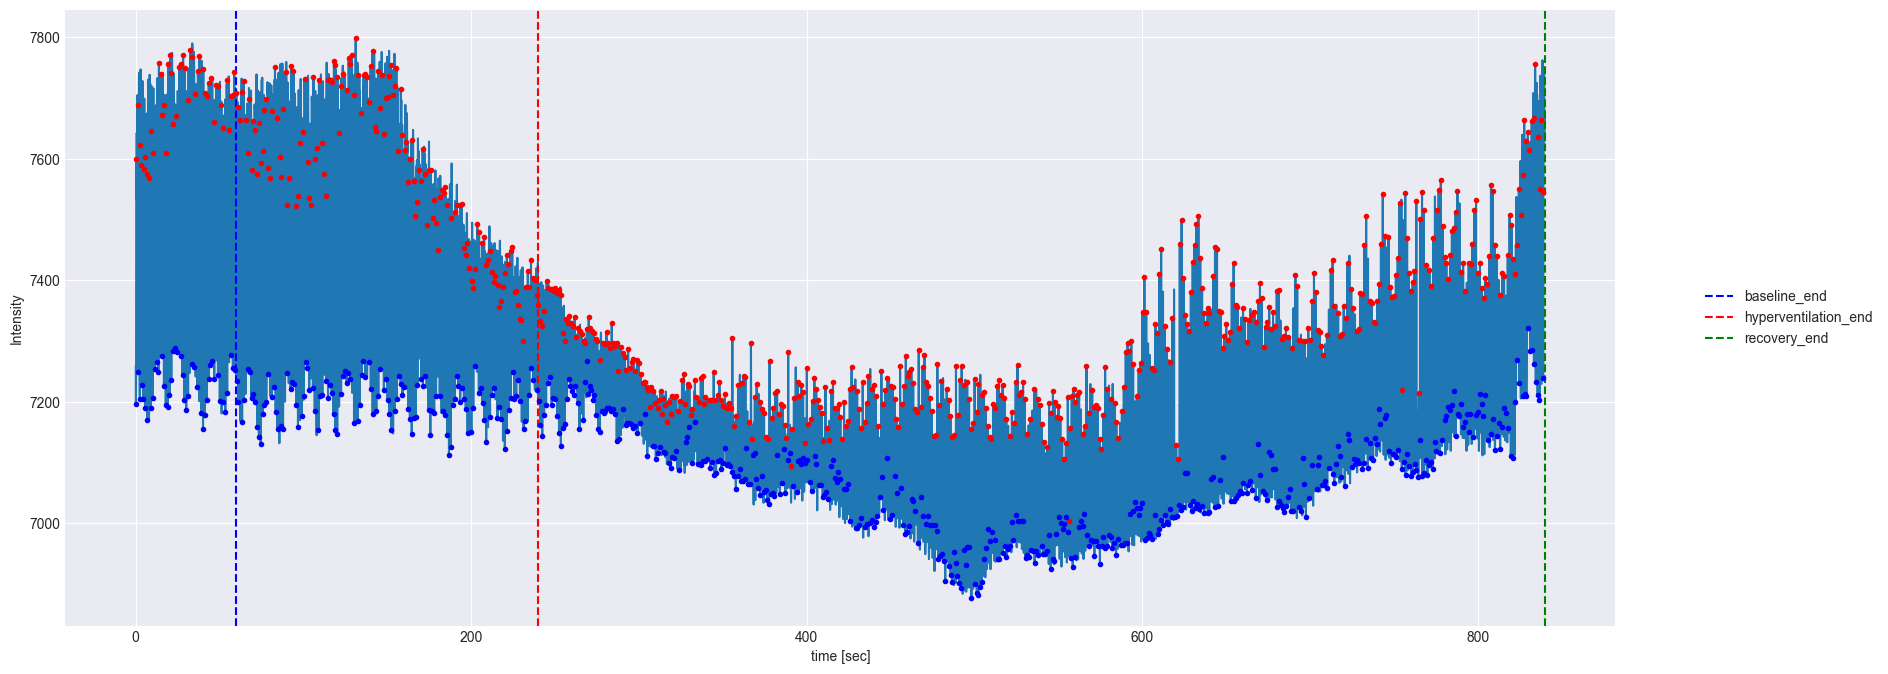

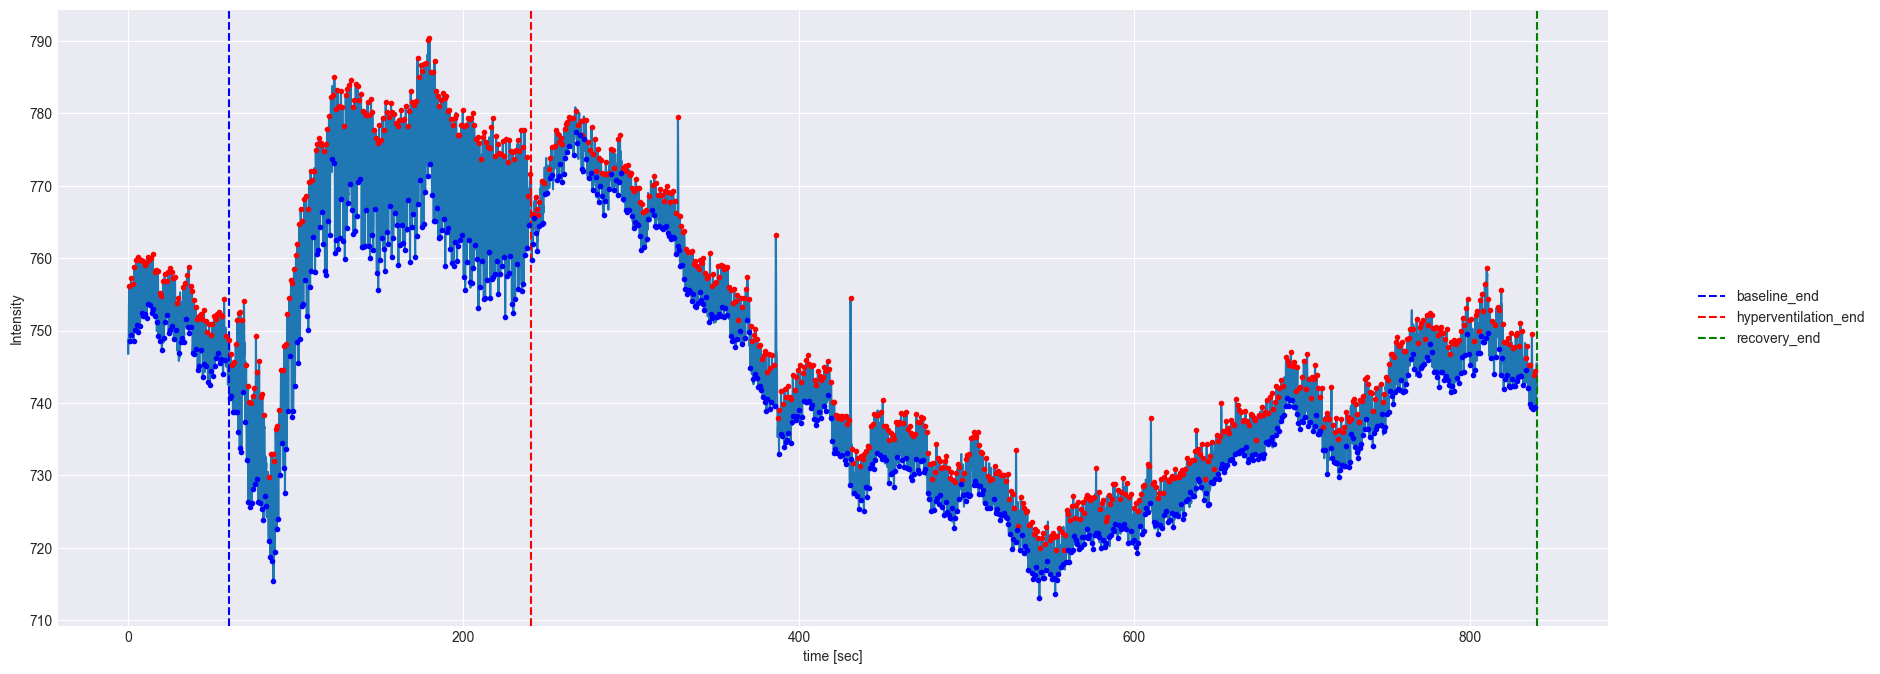

In [134]:
plt.figure(figsize=(20,8))
time = np.linspace(0,recovery_end, mean_of_wl.shape[0])
plt.plot(time, mean_of_wl)
plt.axvline(x=baseline_end, linestyle='--', color='b', label='baseline_end')
plt.axvline(x=HP_end, linestyle='--', color='r', label='hyperventilation_end')
plt.axvline(recovery_end, linestyle='--', color='g', label='recovery_end')
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),
          fancybox=True, shadow=True)
plt.plot(time[max_id], mean_of_wl[max_id], 'r.')
plt.plot(time[min_id], mean_of_wl[min_id], 'b.')
plt.xlabel("time [sec]")
plt.ylabel("Intensity")
plt.savefig(os.path.join('pic', 'SDS1', date, 'output.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(20,8))
time = np.linspace(0,recovery_end, mean_of_wl2.shape[0])
plt.plot(time, mean_of_wl2)
plt.axvline(x=baseline_end, linestyle='--', color='b', label='baseline_end')
plt.axvline(x=HP_end, linestyle='--', color='r', label='hyperventilation_end')
plt.axvline(recovery_end, linestyle='--', color='g', label='recovery_end')
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),
          fancybox=True, shadow=True)
plt.plot(time[max_id2], mean_of_wl2[max_id2], 'r.')
plt.plot(time[min_id2], mean_of_wl2[min_id2], 'b.')
plt.xlabel("time [sec]")
plt.ylabel("Intensity")
plt.savefig(os.path.join('pic', 'SDS2', date, 'output.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

In [135]:
with open(os.path.join("OPs_used", "wavelength.json"), 'r') as f:
    wavelength = json.load(f)
    wavelength = wavelength['wavelength']
wavelength = np.array(wavelength)# shift 25 nm

In [136]:
# for SDS1
from scipy.interpolate import interp1d

# Cubic spline interpolation
f_interpolate = interp1d(used_wl, np_data, kind='linear', bounds_error=False, fill_value='extrapolate')
used_wl_data = f_interpolate(wavelength)
used_wl_data.shape


# for SDS2
acumulate_table = {}
accmulate_range_of_wl = 2 # 1 nm
for comp_wl in wavelength:
    cumulate_index = []
    for idx, each_used_wl in enumerate(used_wl2):
        if abs(float(each_used_wl) - comp_wl) < accmulate_range_of_wl:
            cumulate_index += [idx]
    acumulate_table[comp_wl] = cumulate_index

acumulate_table

{700: [0, 1, 2],
 710: [19, 20, 21, 22, 23, 24, 25, 26, 27, 28],
 717: [38, 39, 40, 41, 42, 43, 44, 45, 46, 47],
 725: [59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
 732: [78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88],
 740: [100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110],
 743: [108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118],
 748: [121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131],
 751: [130, 131, 132, 133, 134, 135, 136, 137, 138, 139],
 753: [135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145],
 758: [149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159],
 763: [162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172],
 768: [176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186],
 780: [209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219],
 792: [242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252],
 798: [259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269],
 805: [278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288],
 815: [306, 307, 308, 309, 310, 

In [137]:
used_wl_data.shape

(8400, 20)

In [138]:
# for idx, wl in enumerate(acumulate_table.keys()):
#     accmulate_idx = acumulate_table[wl]
#     each_wl_data = np_data[:, accmulate_idx]
#     mean_of_each_wl_data = each_wl_data.mean(1).reshape(-1,1)
#     if idx == 0:
#         used_wl_data = mean_of_each_wl_data
#     else:
#         used_wl_data = np.concatenate((used_wl_data, mean_of_each_wl_data), axis=1)

for idx, wl in enumerate(acumulate_table.keys()):
    accmulate_idx = acumulate_table[wl]
    each_wl_data = np_data2[:, accmulate_idx]
    mean_of_each_wl_data = each_wl_data.mean(1).reshape(-1,1)
    if idx == 0:
        used_wl_data2 = mean_of_each_wl_data
    else:
        used_wl_data2 = np.concatenate((used_wl_data2, mean_of_each_wl_data), axis=1)

used_wl_data2.shape

(8449, 20)

In [139]:
used_wl_data

array([[1894.88330864, 3119.35585185, 3908.1257284 , ..., 8375.00666667,
        6678.9828642 , 4976.79316872],
       [1877.07507819, 3071.82992593, 3854.72243621, ..., 8251.58444444,
        6631.5557037 , 4737.45078189],
       [1857.75902881, 3101.34350617, 3910.93560494, ..., 8285.2437037 ,
        6707.30879012, 4785.02526749],
       ...,
       [2091.0734321 , 3415.27683951, 4186.03107819, ..., 8646.30296296,
        6904.48903704, 5053.70757202],
       [2071.96479012, 3444.19288889, 4189.85741564, ..., 8637.31037037,
        6854.24953086, 5109.00633745],
       [2082.63557202, 3457.02251852, 4262.16523457, ..., 8574.19185185,
        6866.052     , 4937.11004115]])

In [140]:
used_wl_data2

array([[283.74990981, 388.36452922, 508.96761364, ..., 788.99257182,
        608.82445396, 452.67126623],
       [281.99990981, 383.52702922, 505.48011364, ..., 787.35620819,
        609.41536305, 458.42126623],
       [286.54157648, 381.76452922, 506.50511364, ..., 788.41302637,
        610.26763577, 452.92126623],
       ...,
       [291.70824315, 392.42702922, 515.44261364, ..., 763.31075364,
        590.42672668, 448.29626623],
       [289.79157648, 389.78952922, 520.58011364, ..., 763.60620819,
        590.7449085 , 439.17126623],
       [288.62490981, 388.95202922, 512.68011364, ..., 768.41302637,
        592.2449085 , 442.42126623]])

In [141]:
used_wl_data[max_id].shape

(689, 20)

In [142]:
used_wl_data[min_id].shape

(652, 20)

In [143]:
cali = pd.read_csv(os.path.join('dataset', 'reg.csv'))
temp = cali.to_numpy()
cali, cali_wl = temp[:,-2:], temp[:,0]
f_interpolate = interp1d(cali_wl, cali[:,0], kind='linear', bounds_error=False, fill_value='extrapolate')
temp = f_interpolate(wavelength).reshape(1,-1)
f_interpolate = interp1d(cali_wl, cali[:,1], kind='linear', bounds_error=False, fill_value='extrapolate')
temp2 = f_interpolate(wavelength).reshape(1,-1)

cali = np.concatenate((temp,temp2))
cali.shape
cali

array([[ 1.54919315e-12,  1.12361955e-12,  9.07770054e-13,
         7.03628549e-13,  5.71587758e-13,  4.63648892e-13,
         4.45769132e-13,  4.31736778e-13,  4.29624263e-13,
         4.21008701e-13,  3.81451746e-13,  3.61205302e-13,
         3.45786485e-13,  3.33458271e-13,  3.35247925e-13,
         3.44463821e-13,  3.59431870e-13,  3.94427820e-13,
         4.65112735e-13,  6.00500837e-13],
       [-5.01267105e-10, -6.87342515e-10, -5.73775102e-10,
        -9.12910123e-10, -8.83955836e-10, -1.11568820e-09,
        -1.15387141e-09, -1.03074723e-09, -8.82167572e-10,
        -7.85053287e-10, -5.47114623e-10, -6.49389022e-10,
        -8.36716687e-10, -1.05269732e-09, -7.18954135e-10,
        -6.99364384e-10, -1.22607424e-09, -9.88041885e-10,
        -9.49104029e-10, -1.29552833e-09]])

In [144]:
cali = pd.read_csv(os.path.join('dataset', 'calibrate_SDS_1.csv'))
cali = cali.to_numpy()
cali.shape

(2, 20)

In [145]:
cali_used_wl_data = (used_wl_data*cali[0] + cali[1])
cali_used_wl_data

array([[6.49483840e-06, 6.43139862e-06, 6.31875207e-06, ...,
        5.14013147e-06, 5.01018143e-06, 4.56904040e-06],
       [6.43383825e-06, 6.33389693e-06, 6.23288501e-06, ...,
        5.06514981e-06, 4.97489741e-06, 4.35119077e-06],
       [6.36767322e-06, 6.39444544e-06, 6.32327006e-06, ...,
        5.08559854e-06, 5.03125486e-06, 4.39449310e-06],
       ...,
       [7.16686631e-06, 7.03849457e-06, 6.76559559e-06, ...,
        5.30494982e-06, 5.17794956e-06, 4.63904794e-06],
       [7.10141174e-06, 7.09781722e-06, 6.77174795e-06, ...,
        5.29948662e-06, 5.14057326e-06, 4.68938092e-06],
       [7.13796334e-06, 7.12413781e-06, 6.88801157e-06, ...,
        5.26114076e-06, 5.14935385e-06, 4.53292078e-06]])

In [146]:
cali2 = pd.read_csv(os.path.join('dataset', 'calibrate_SDS_2.csv'))
cali2 = cali2.to_numpy()
cali2

array([[5.12242764e-11, 3.81262303e-11, 2.91089850e-11, 2.28381089e-11,
        1.88762744e-11, 1.54530044e-11, 1.46229476e-11, 1.29047743e-11,
        1.23941280e-11, 1.22898592e-11, 1.17193195e-11, 1.10745983e-11,
        1.05544973e-11, 1.00683338e-11, 9.64596494e-12, 9.85867040e-12,
        9.70533337e-12, 1.06156786e-11, 1.23797832e-11, 1.59724026e-11],
       [5.54835676e-09, 5.97739574e-09, 6.40073479e-09, 6.78924197e-09,
        6.84692467e-09, 6.16092474e-09, 6.06931792e-09, 7.63603242e-09,
        8.18532599e-09, 8.31290256e-09, 8.71928254e-09, 9.25707338e-09,
        9.53452610e-09, 9.88165575e-09, 1.08504223e-08, 1.12010168e-08,
        1.16050422e-08, 1.14784295e-08, 1.27699157e-08, 1.43540764e-08]])

In [147]:
cali_used_wl_data2 = (used_wl_data2*cali2[0] + cali2[1])
cali_used_wl_data2

array([[2.00832406e-08, 2.07842712e-08, 2.12162654e-08, ...,
        1.98541210e-08, 2.03070305e-08, 2.15843241e-08],
       [1.99935981e-08, 2.05998356e-08, 2.11147478e-08, ...,
        1.98367499e-08, 2.03143458e-08, 2.16761654e-08],
       [2.02262417e-08, 2.05326381e-08, 2.11445845e-08, ...,
        1.98479687e-08, 2.03248968e-08, 2.15883172e-08],
       ...,
       [2.04909004e-08, 2.09391590e-08, 2.14047461e-08, ...,
        1.95814911e-08, 2.00792706e-08, 2.15144448e-08],
       [2.03927206e-08, 2.08386011e-08, 2.15542935e-08, ...,
        1.95846275e-08, 2.00832096e-08, 2.13686967e-08],
       [2.03329589e-08, 2.08066704e-08, 2.13243325e-08, ...,
        1.96356552e-08, 2.01017793e-08, 2.14206070e-08]])

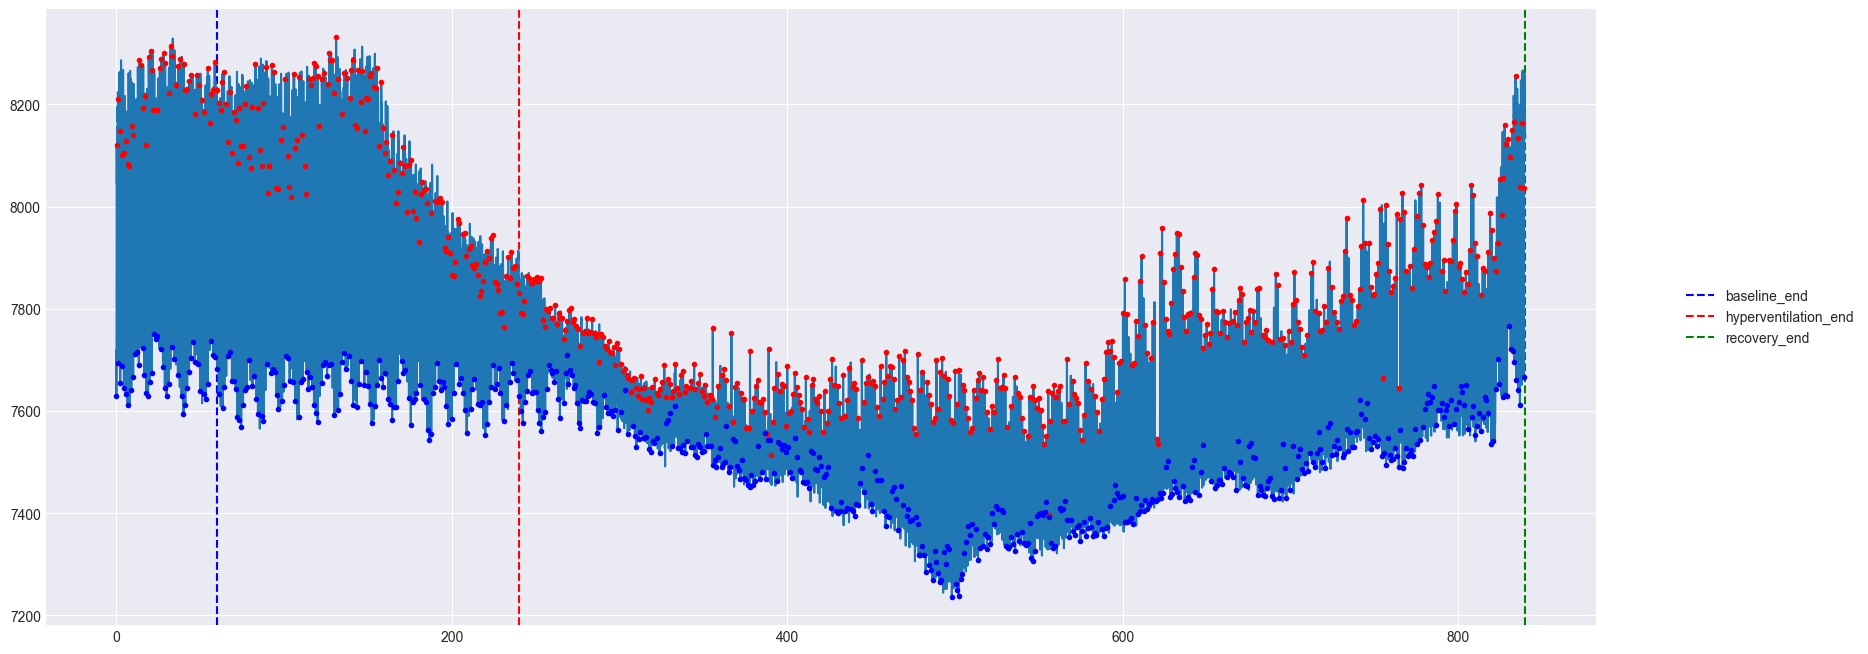

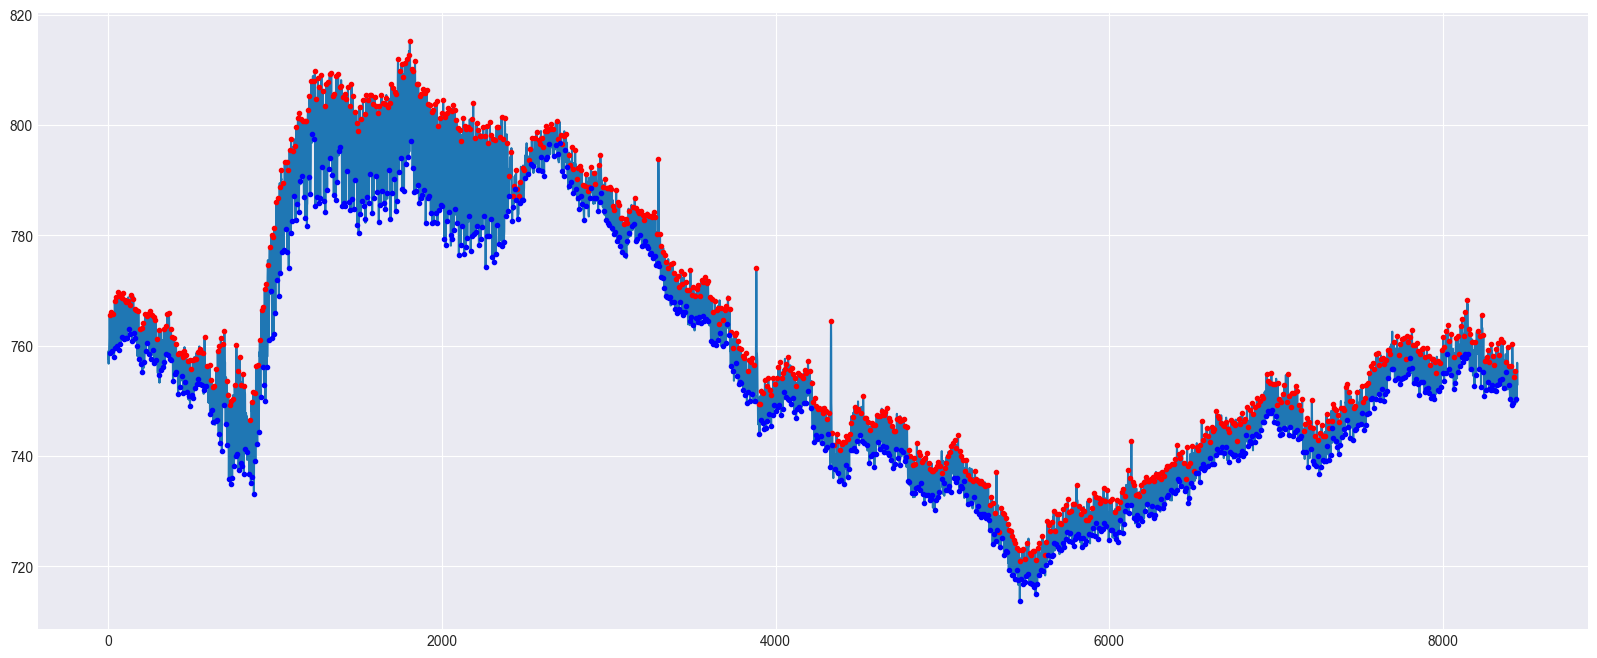

In [148]:
plt.figure(figsize=(20,8))
time = np.linspace(0,recovery_end, used_wl_data.shape[0])
plt.axvline(x=baseline_end, linestyle='--', color='b', label='baseline_end')
plt.axvline(x=HP_end, linestyle='--', color='r', label='hyperventilation_end')
plt.axvline(recovery_end, linestyle='--', color='g', label='recovery_end')
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),
          fancybox=True, shadow=True)
plt.plot(time, used_wl_data.mean(1))
plt.plot(time[max_id], used_wl_data.mean(1)[max_id], 'r.')
plt.plot(time[min_id], used_wl_data.mean(1)[min_id], 'b.')
plt.show()

plt.figure(figsize=(20,8))
plt.plot(used_wl_data2.mean(1))
plt.plot(max_id2, used_wl_data2.mean(1)[max_id2], 'r.')
plt.plot(min_id2, used_wl_data2.mean(1)[min_id2], 'b.')
plt.show()

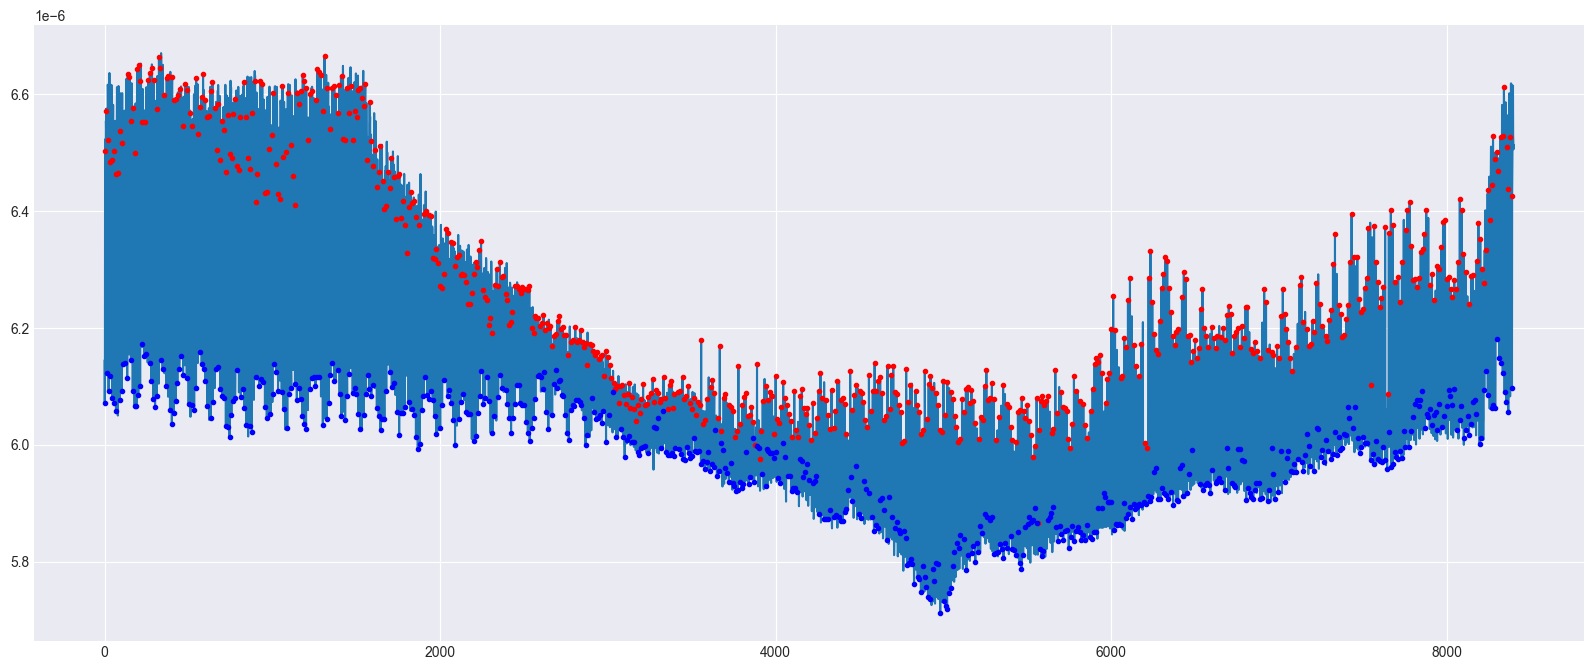

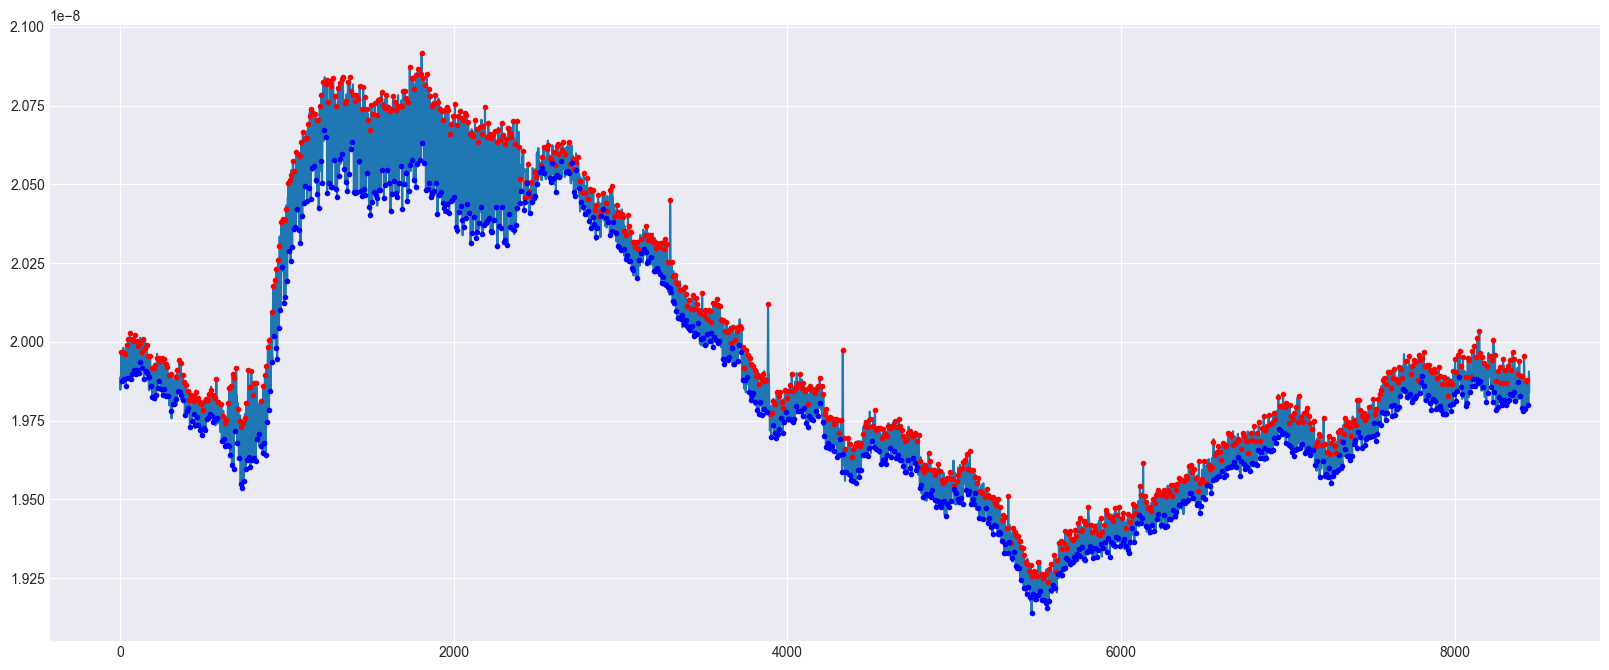

In [149]:
plt.figure(figsize=(20,8))
plt.plot(cali_used_wl_data.mean(1))
plt.plot(max_id, cali_used_wl_data.mean(1)[max_id], 'r.')
plt.plot(min_id, cali_used_wl_data.mean(1)[min_id], 'b.')
plt.show()

plt.figure(figsize=(20,8))
plt.plot(cali_used_wl_data2.mean(1))
plt.plot(max_id2, cali_used_wl_data2.mean(1)[max_id2], 'r.')
plt.plot(min_id2, cali_used_wl_data2.mean(1)[min_id2], 'b.')
plt.show()

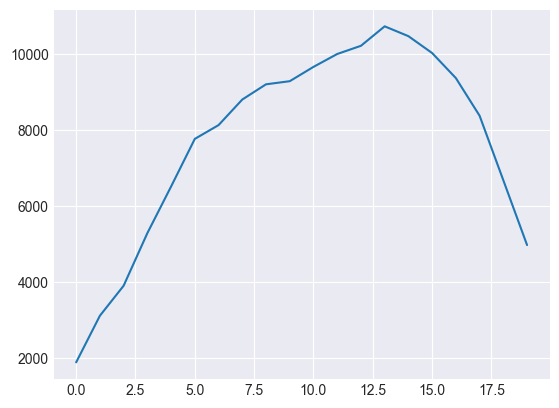

In [150]:
plt.plot(used_wl_data[0,:])
plt.show()

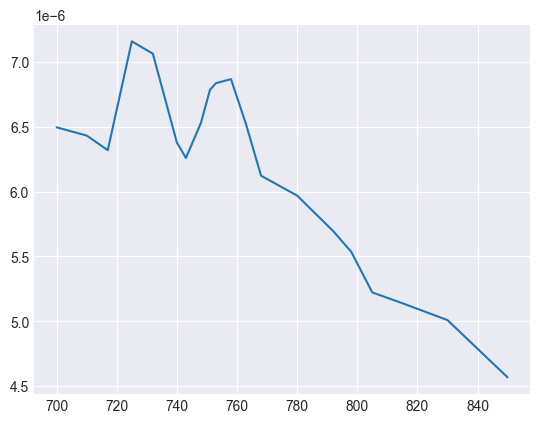

In [151]:
plt.plot(wavelength, cali_used_wl_data[0,:])
plt.show()

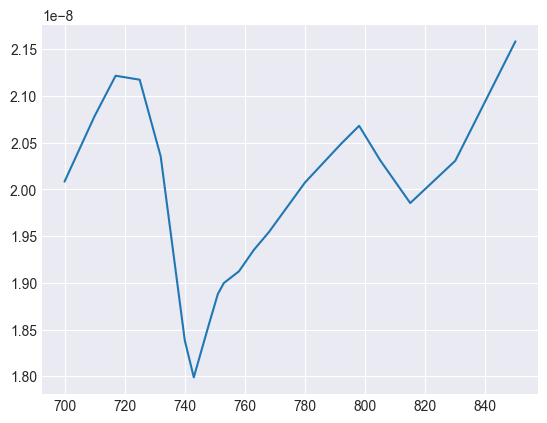

In [152]:
plt.plot(wavelength, cali_used_wl_data2[0,:])
plt.show()

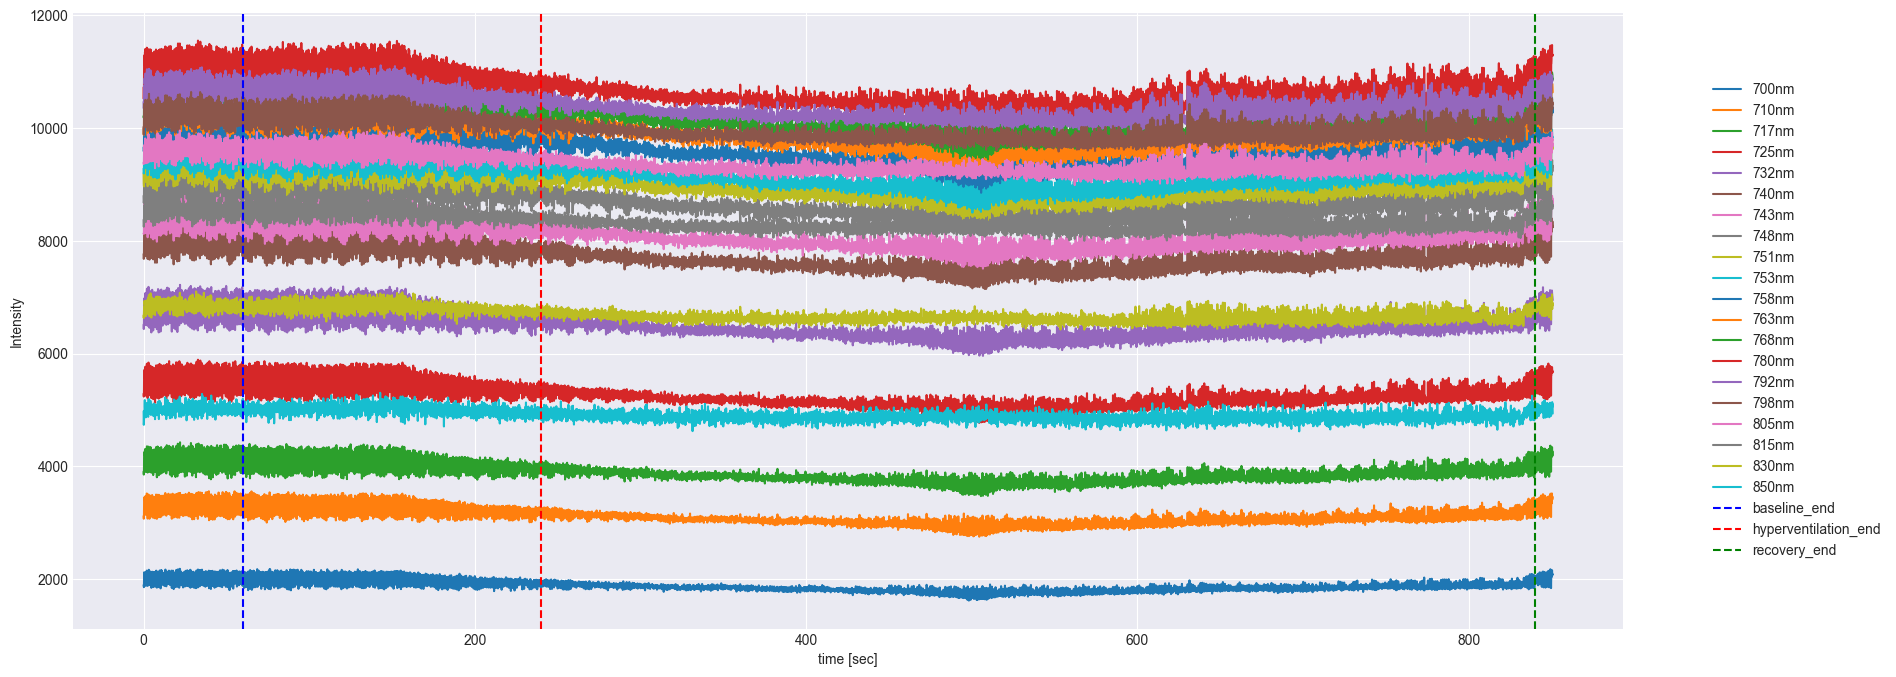

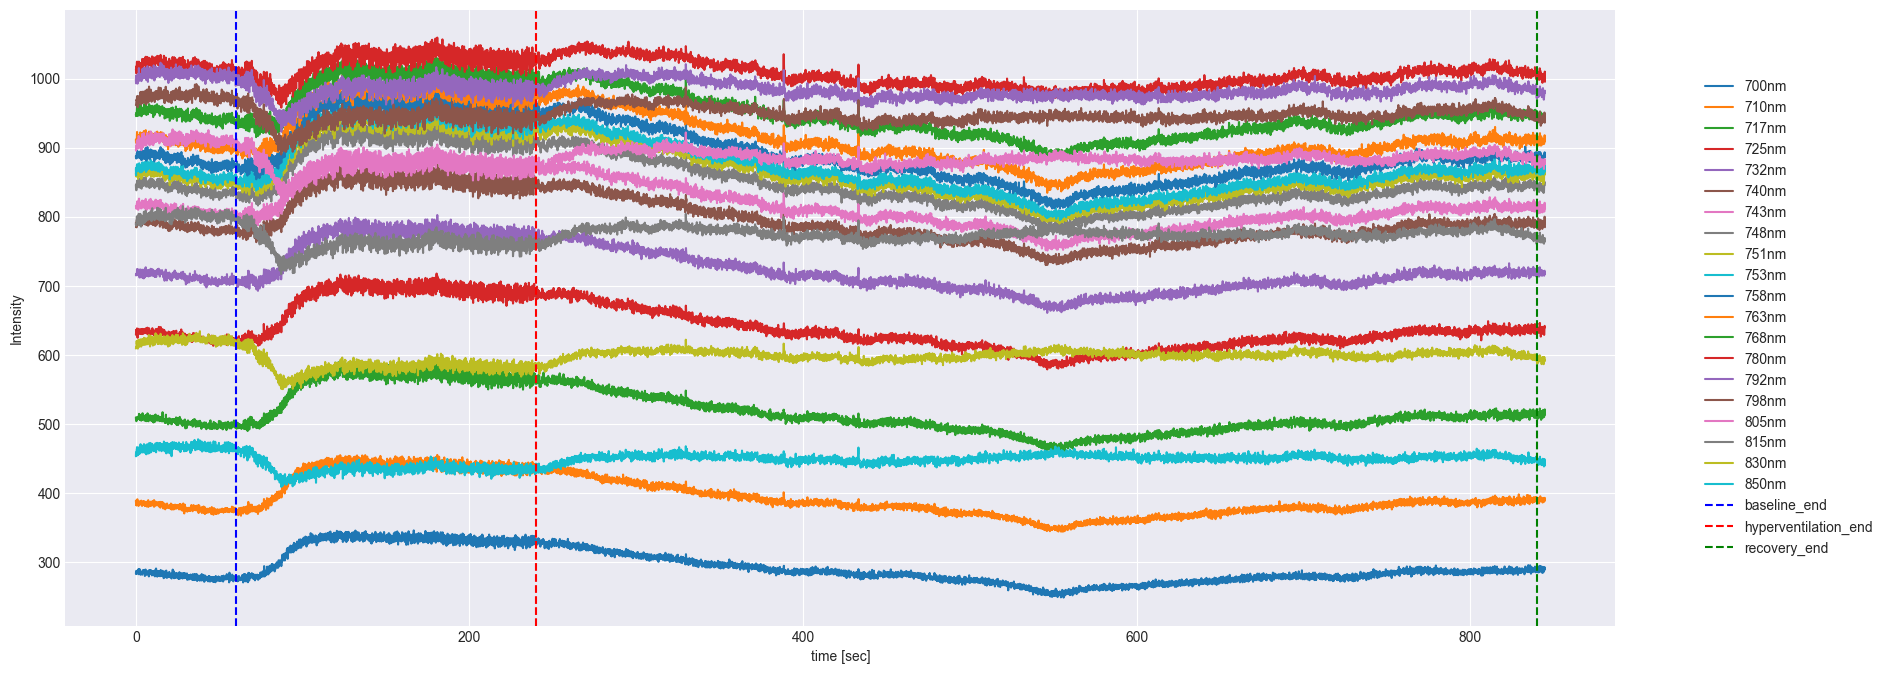

In [153]:
plt.figure(figsize=(20,8))
time = [i*SDS1_time_resolution for i in range(used_wl_data.shape[0])]
for i in range(20):
    plt.plot(time, used_wl_data[:,i], label=f'{wavelength[i]}nm')

plt.axvline(x=baseline_end, linestyle='--', color='b', label='baseline_end')
plt.axvline(x=HP_end, linestyle='--', color='r', label='hyperventilation_end')
plt.axvline(x=recovery_end, linestyle='--', color='g', label='recovery_end')
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),
          fancybox=True, shadow=True)
plt.xlabel('time [sec]')
plt.ylabel('Intensity')
plt.savefig(os.path.join('pic', 'SDS1', date, 'output2.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(20,8))
time = [i*SDS2_time_resolution for i in range(used_wl_data2.shape[0])]
for i in range(20):
    plt.plot(time,used_wl_data2[:,i], label=f'{wavelength[i]}nm')

plt.axvline(x=baseline_end, linestyle='--', color='b', label='baseline_end')
plt.axvline(x=HP_end, linestyle='--', color='r', label='hyperventilation_end')
plt.axvline(x=recovery_end, linestyle='--', color='g', label='recovery_end')
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),
          fancybox=True, shadow=True)
plt.xlabel('time [sec]')
plt.ylabel('Intensity')
plt.savefig(os.path.join('pic', 'SDS2', date, 'output2.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

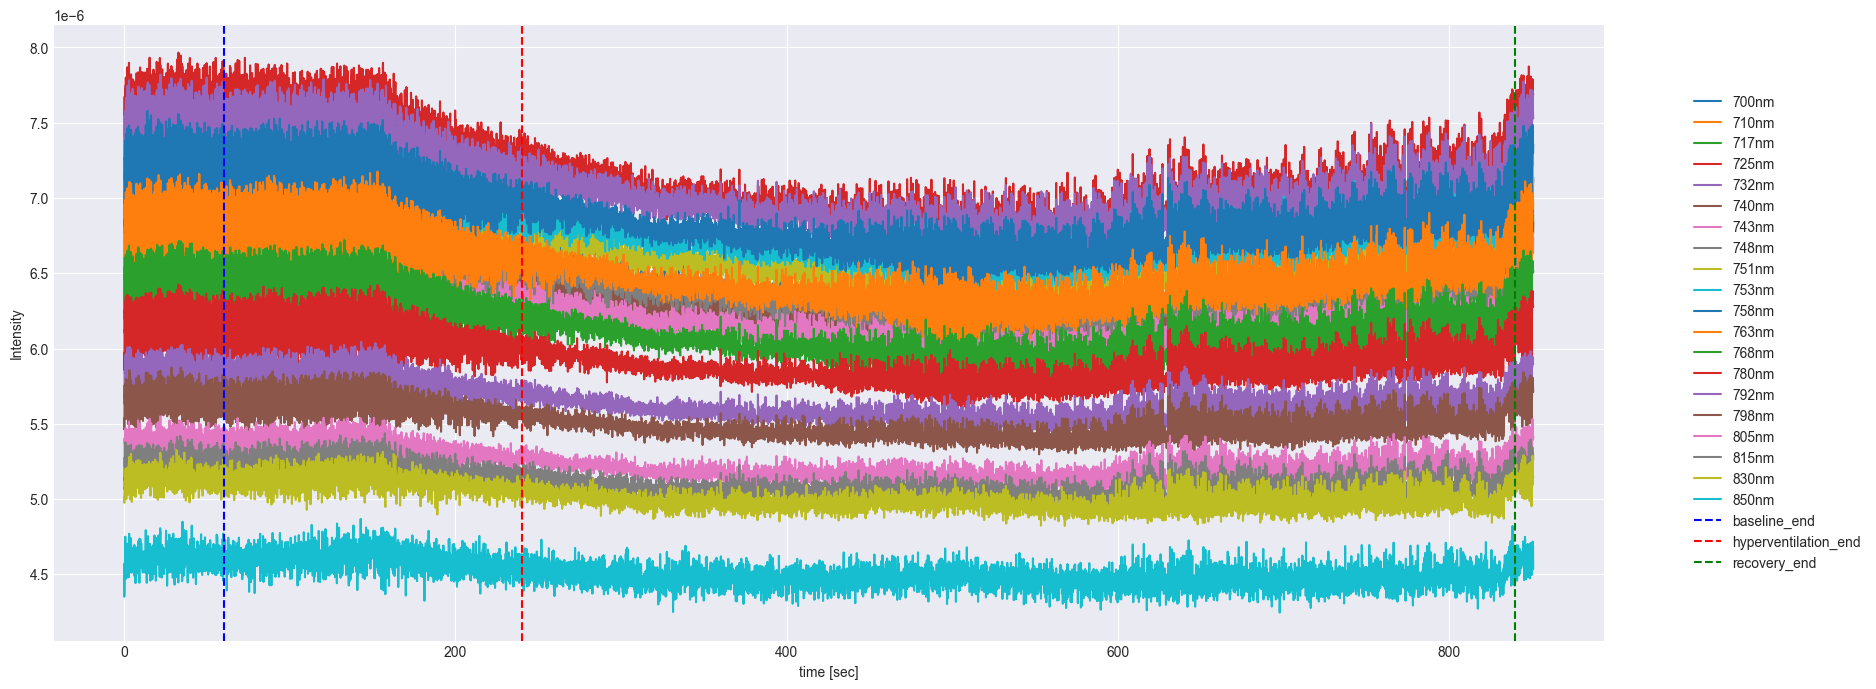

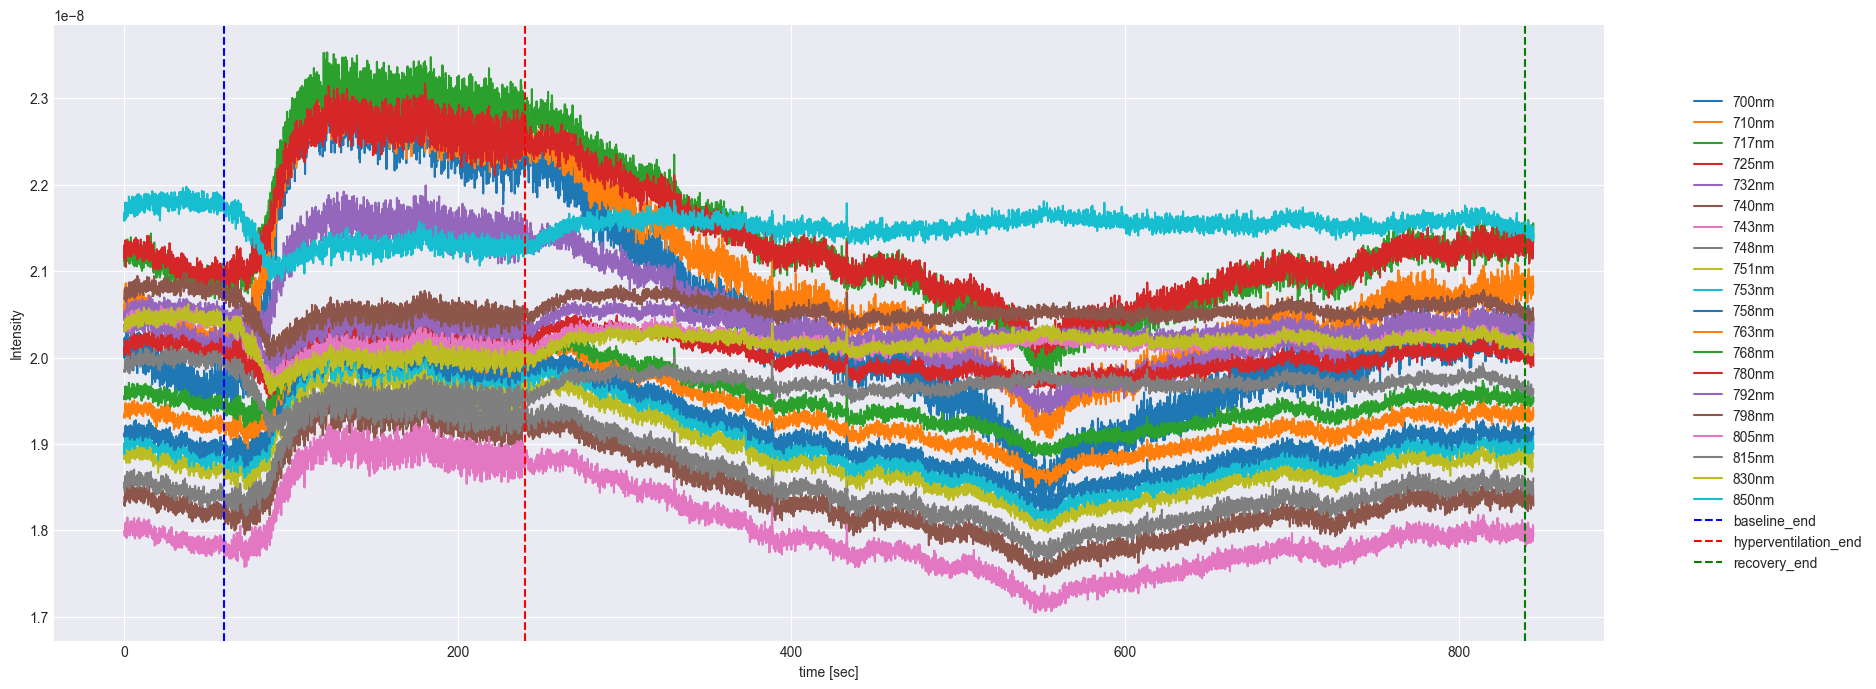

In [154]:
plt.figure(figsize=(20,8))
time = [i*SDS1_time_resolution for i in range(cali_used_wl_data.shape[0])]
for i in range(20):
    plt.plot(time, cali_used_wl_data[:,i], label=f'{wavelength[i]}nm')
plt.axvline(x=baseline_end, linestyle='--', color='b', label='baseline_end')
plt.axvline(x=HP_end, linestyle='--', color='r', label='hyperventilation_end')
plt.axvline(recovery_end, linestyle='--', color='g', label='recovery_end')    
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),
          fancybox=True, shadow=True)
plt.xlabel('time [sec]')
plt.ylabel('Intensity')
plt.savefig(os.path.join('pic', 'SDS1', date, 'output2_cali.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(20,8))
time = [i*SDS2_time_resolution for i in range(cali_used_wl_data2.shape[0])]
for i in range(20):
    plt.plot(time,cali_used_wl_data2[:,i], label=f'{wavelength[i]}nm')
plt.axvline(x=baseline_end, linestyle='--', color='b', label='baseline_end')
plt.axvline(x=HP_end, linestyle='--', color='r', label='hyperventilation_end')
plt.axvline(recovery_end, linestyle='--', color='g', label='recovery_end') 
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),
          fancybox=True, shadow=True)
plt.xlabel('time [sec]')
plt.ylabel('Intensity')
plt.savefig(os.path.join('pic', 'SDS2', date, 'output2_cali.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

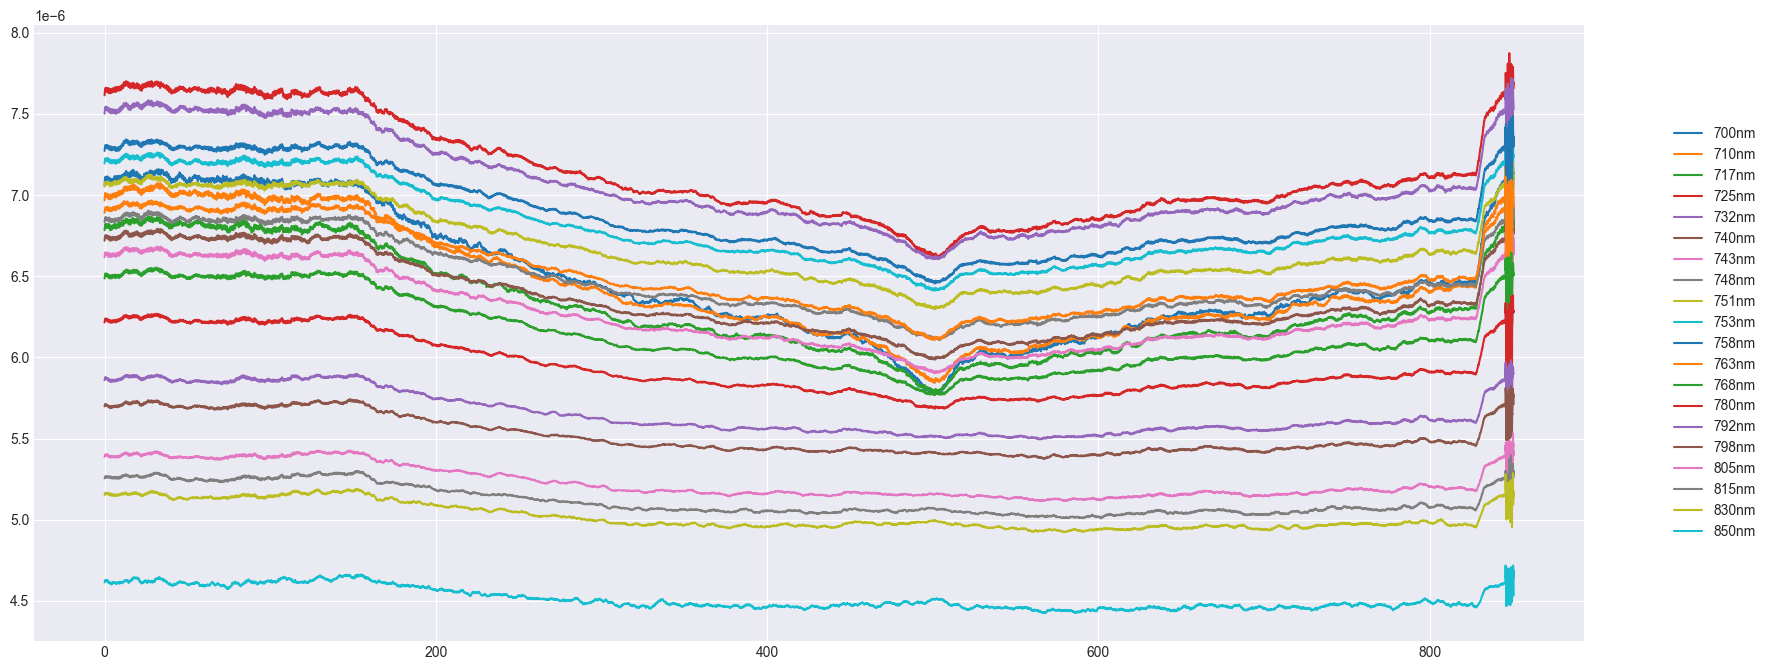

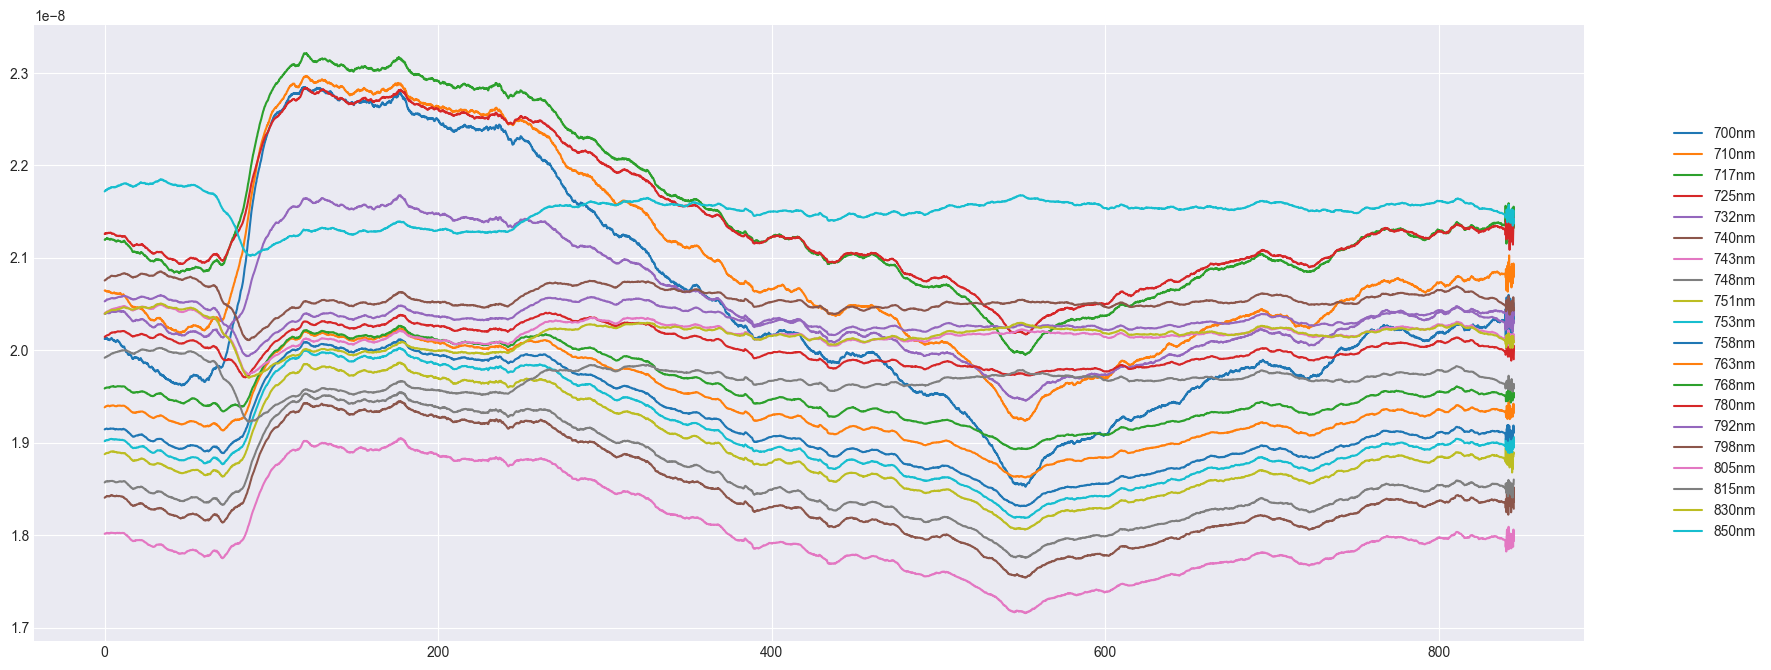

In [155]:
# SDS1 
# resolution = used_wl[1] - used_wl[0]
average_points = int(5/SDS1_time_resolution) # sec/resolution
moving_avg_cali_used_wl_data = cali_used_wl_data.copy()
for i in range(cali_used_wl_data.shape[0]-average_points):
    moving_avg_cali_used_wl_data[i,:] = cali_used_wl_data[i:i+average_points,:].mean(0)
    
plt.figure(figsize=(20,8))
time = [i*SDS1_time_resolution for i in range(moving_avg_cali_used_wl_data.shape[0])]
for i in range(20):
    plt.plot(time, moving_avg_cali_used_wl_data[:,i], label=f'{wavelength[i]}nm')
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),
          fancybox=True, shadow=True)
plt.savefig(os.path.join('pic', 'SDS1', date, 'output2_cali_filter.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

# SDS2 
average_points = int(5/SDS2_time_resolution) # sec/resolution
moving_avg_cali_used_wl_data2 = cali_used_wl_data2.copy()
for i in range(cali_used_wl_data2.shape[0]-average_points):
    moving_avg_cali_used_wl_data2[i,:] = cali_used_wl_data2[i:i+average_points,:].mean(0)
    
plt.figure(figsize=(20,8))
time = [i*SDS2_time_resolution for i in range(moving_avg_cali_used_wl_data2.shape[0])]
for i in range(20):
    plt.plot(time, moving_avg_cali_used_wl_data2[:,i], label=f'{wavelength[i]}nm')
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),
          fancybox=True, shadow=True)
plt.savefig(os.path.join('pic', 'SDS2', date, 'output2_cali_filter.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

In [306]:
# load model 
import torch
from ANN_models import PredictionModel, PredictionModel2, PredictionModel3, PredictionModel4, PredictionModel5
with open(os.path.join("model_save", "prediction_model_formula3", "trlog.json"), 'r') as f:
    trlog = json.load(f)
    best_model = trlog['best_model']
model = PredictionModel3().cuda()
# model = PredictionModel5(neuronsize=1).cuda()
model.load_state_dict(torch.load(best_model))


<All keys matched successfully>

In [261]:
# used calibrate data
used_wl_data = cali_used_wl_data
used_wl_data2 = cali_used_wl_data2

In [262]:
used_wl_data.shape

(8400, 20)

In [222]:
used_wl_data2.shape

(8449, 20)

In [223]:
max_id*2

array([    6,    22,    46,    68,    94,   112,   138,   156,   184,
         204,   276,   296,   316,   340,   360,   388,   412,   426,
         444,   482,   520,   540,   566,   584,   626,   648,   666,
         712,   740,   760,   806,   822,   850,   870,   896,   938,
         960,   984,  1022,  1044,  1092,  1116,  1134,  1156,  1174,
        1200,  1222,  1248,  1266,  1286,  1314,  1338,  1356,  1382,
        1400,  1426,  1448,  1466,  1492,  1514,  1530,  1552,  1582,
        1604,  1620,  1660,  1686,  1714,  1736,  1752,  1788,  1804,
        1822,  1856,  1880,  1910,  1932,  1960,  1992,  2012,  2048,
        2066,  2088,  2116,  2132,  2158,  2184,  2220,  2246,  2268,
        2294,  2322,  2344,  2362,  2378,  2404,  2422,  2450,  2476,
        2520,  2538,  2554,  2578,  2600,  2622,  2650,  2688,  2716,
        2732,  2756,  2784,  2800,  2826,  2848,  2870,  2888,  2916,
        2934,  2962,  2982,  3004,  3022,  3040,  3070,  3092,  3108,
        3132,  3160,

In [224]:
max_id2

array([   7,   18,   28,   38,   48,   59,   69,   79,   88,   99,  108,
        118,  128,  138,  148,  160,  168,  179,  190,  200,  210,  220,
        232,  240,  251,  261,  272,  282,  293,  302,  332,  343,  354,
        363,  375,  384,  394,  405,  415,  425,  435,  445,  455,  466,
        476,  486,  496,  506,  516,  526,  535,  546,  556,  566,  576,
        588,  606,  617,  626,  635,  646,  655,  664,  674,  685,  695,
        708,  718,  727,  737,  747,  757,  767,  776,  786,  795,  805,
        815,  846,  859,  868,  877,  885,  895,  908,  918,  927,  937,
        946,  955,  967,  978,  986,  995, 1007, 1016, 1026, 1035, 1045,
       1057, 1068, 1077, 1086, 1095, 1106, 1118, 1126, 1136, 1145, 1157,
       1166, 1177, 1186, 1196, 1205, 1217, 1231, 1237, 1246, 1256, 1265,
       1277, 1286, 1296, 1305, 1315, 1327, 1335, 1346, 1355, 1365, 1377,
       1386, 1397, 1406, 1416, 1427, 1436, 1447, 1457, 1465, 1477, 1488,
       1496, 1506, 1515, 1526, 1537, 1545, 1555, 15

In [225]:
sds1_ijv_small = used_wl_data[max_id[0]]
sds1_ijv_large = used_wl_data[min_id[0]]

sds2_ijv_small = used_wl_data2[max_id2[0]]
sds2_ijv_large = used_wl_data2[min_id2[0]]
sds2_ijv_large

array([2.00640315e-08, 2.05602796e-08, 2.11842455e-08, 2.12654202e-08,
       2.03927827e-08, 1.83488328e-08, 1.79282101e-08, 1.85251102e-08,
       1.88597969e-08, 1.90131252e-08, 1.90982977e-08, 1.93854620e-08,
       1.95434813e-08, 2.00439282e-08, 2.04502080e-08, 2.06832907e-08,
       2.03349676e-08, 1.99067169e-08, 2.03057644e-08, 2.16362344e-08])

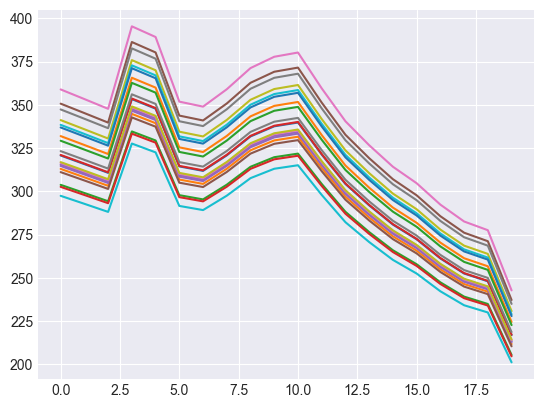

In [226]:
OD1_spec = []
for sds2_large in sds2_ijv_large:
    for sds1_large in sds1_ijv_large:
        OD1_spec += [sds1_large/sds2_large]

for sds2_small in sds2_ijv_small:
    for sds1_small in sds1_ijv_small:
        OD1_spec += [sds1_small/sds2_small]

OD1_spec = np.array(OD1_spec)
for i in range(20):
    # OD1_spec[i*20:i*20+20] = (OD1_spec[i*20:i*20+20] - OD1_spec[i*20:i*20+20].mean()) / (OD1_spec[i*20:i*20+20].max() - OD1_spec[i*20:i*20+20].min())
    plt.plot(OD1_spec[i*20:i*20+20])
plt.show()

In [164]:
OD1_spec

array([320.66527906, 315.68416072, 310.64968273, 353.2507096 ,
       347.7412686 , 314.36160428, 311.77730034, 320.75251109,
       331.68988439, 337.53534183, 339.72698982, 321.2217726 ,
       304.21674477, 291.84538663, 280.73268962, 272.21719132,
       261.16233623, 252.44925602, 247.95103703, 216.86522863,
       312.92561998, 308.06472718, 303.15176264, 344.72456024,
       339.34809651, 306.7740923 , 304.25216378, 313.01074655,
       323.68413262, 329.3885026 , 331.52725241, 313.46868185,
       296.87409171, 284.80133183, 273.95685372, 265.64688765,
       254.85885537, 246.35607629, 241.96642747, 211.63091407,
       303.7086328 , 298.99091391, 294.22265702, 334.57095935,
       329.35285529, 297.73829371, 295.29064669, 303.79125204,
       314.1502616 , 319.68661367, 321.76236824, 304.23569919,
       288.12989014, 276.41272426, 265.88766204, 257.82245973,
       247.35218077, 239.09984461, 234.83948957, 205.39748575,
       302.549312  , 297.84960166, 293.09954623, 333.29

In [165]:
sds1_ijv_small = used_wl_data[max_id[120]]
sds1_ijv_large = used_wl_data[min_id[120]]

sds2_ijv_small = used_wl_data2[max_id2[120]]
sds2_ijv_large = used_wl_data2[min_id2[120]]
sds2_ijv_large

array([2.24843785e-08, 2.27482487e-08, 2.29511609e-08, 2.25568114e-08,
       2.13453910e-08, 1.92626672e-08, 1.88562688e-08, 1.93287257e-08,
       1.96280779e-08, 1.97774706e-08, 1.99163861e-08, 2.00311866e-08,
       2.00557343e-08, 2.01479295e-08, 2.02649617e-08, 2.03316275e-08,
       1.99291082e-08, 1.94914991e-08, 1.98448988e-08, 2.11550658e-08])

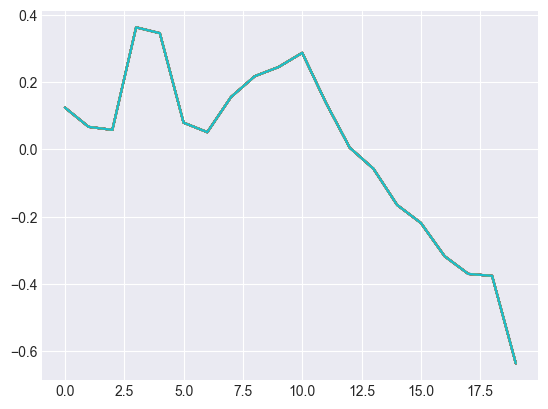

In [166]:
OD2_spec = []
for sds2_large in sds2_ijv_large:
    for sds1_large in sds1_ijv_large:
        OD2_spec += [sds1_large/sds2_large]

for sds2_small in sds2_ijv_small:
    for sds1_small in sds1_ijv_small:
        OD2_spec += [sds1_small/sds2_small]

OD2_spec = np.array(OD2_spec)
for i in range(20):
    OD2_spec[i*20:i*20+20] = (OD2_spec[i*20:i*20+20] - OD2_spec[i*20:i*20+20].mean()) / (OD2_spec[i*20:i*20+20].max() - OD2_spec[i*20:i*20+20].min())
    plt.plot(OD2_spec[i*20:i*20+20])
plt.show()

In [167]:
OD2_spec

array([ 1.24672726e-01,  6.72508644e-02,  5.83473594e-02,  3.63463949e-01,
        3.46110480e-01,  7.97469024e-02,  5.14407544e-02,  1.56072863e-01,
        2.18006222e-01,  2.45221109e-01,  2.87495303e-01,  1.38814216e-01,
        5.47627373e-03, -5.72578369e-02, -1.65241263e-01, -2.18775248e-01,
       -3.17747388e-01, -3.70377425e-01, -3.76183811e-01, -6.36536051e-01,
        1.24672726e-01,  6.72508644e-02,  5.83473594e-02,  3.63463949e-01,
        3.46110480e-01,  7.97469024e-02,  5.14407544e-02,  1.56072863e-01,
        2.18006222e-01,  2.45221109e-01,  2.87495303e-01,  1.38814216e-01,
        5.47627373e-03, -5.72578369e-02, -1.65241263e-01, -2.18775248e-01,
       -3.17747388e-01, -3.70377425e-01, -3.76183811e-01, -6.36536051e-01,
        1.24672726e-01,  6.72508644e-02,  5.83473594e-02,  3.63463949e-01,
        3.46110480e-01,  7.97469024e-02,  5.14407544e-02,  1.56072863e-01,
        2.18006222e-01,  2.45221109e-01,  2.87495303e-01,  1.38814216e-01,
        5.47627373e-03, -

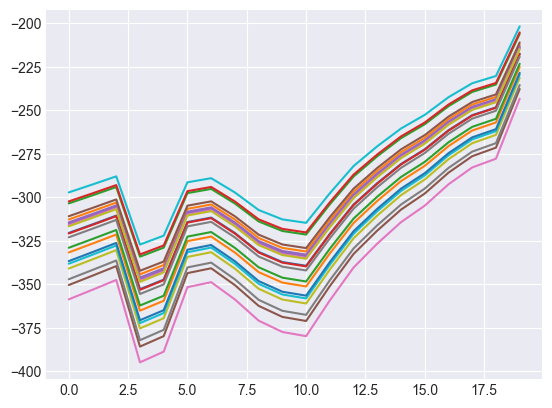

In [168]:
delta_OD = OD2_spec - OD1_spec
# # normalize 
# for i in range(20):
#     delta_OD[i*20:i*20+20] = (delta_OD[i*20:i*20+20] - delta_OD[i*20:i*20+20].mean()) / (delta_OD[i*20:i*20+20].max() - delta_OD[i*20:i*20+20].min())
for i in range(20):
    plt.plot(delta_OD[i*20:i*20+20])
plt.show()

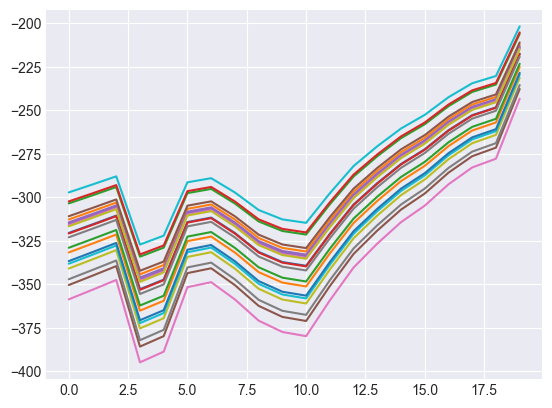

In [169]:
delta_OD = OD2_spec - OD1_spec
# # normalize 
# for i in range(20):
#     delta_OD[i*20:i*20+20] = (delta_OD[i*20:i*20+20] - delta_OD[i*20:i*20+20].mean()) / (delta_OD[i*20:i*20+20].max() - delta_OD[i*20:i*20+20].min())
for i in range(20):
    plt.plot(delta_OD[i*20:i*20+20])
plt.show()

In [292]:
def get_OD(used_wl_data, used_wl_data2, time, average_time=6):
    time_resolution = SDS1_time_resolution
    time_resolution2 = SDS2_time_resolution
    sds1_ijv_small = used_wl_data[max_id[np.where(abs(max_id-round(time/time_resolution))<round(average_time/time_resolution))]].mean(0)
    sds1_ijv_large = used_wl_data[min_id[np.where(abs(min_id-round(time/time_resolution))<round(average_time/time_resolution))]].mean(0)
    
    sds2_ijv_small = used_wl_data2[max_id2[np.where(abs(max_id2-round(time/time_resolution2))<round(average_time/time_resolution2))]].mean(0)
    sds2_ijv_large = used_wl_data2[min_id2[np.where(abs(min_id2-round(time/time_resolution2))<round(average_time/time_resolution2))]].mean(0)
    
    # sds1_ijv_small = used_wl_data[max_id[idx:idx+average_point]].mean(0)
    # sds1_ijv_large = used_wl_data[min_id[idx:idx+average_point]].mean(0)

    # sds2_ijv_small = used_wl_data2[max_id2[idx:idx+average_point]].mean(0)
    # sds2_ijv_large = used_wl_data2[min_id2[idx:idx+average_point]].mean(0)
    OD_spec = []

    for sds2_large in sds2_ijv_large:
        for sds1_large in sds1_ijv_large:
            OD_spec += [np.log(sds1_large/sds2_large)]

    for sds2_small in sds2_ijv_small:
        for sds1_small in sds1_ijv_small:
            OD_spec += [np.log(sds1_small/sds2_small)]

    
    return np.array(OD_spec)
    

In [208]:
max_id.shape

(689,)

In [172]:
min_id.shape

(652,)

In [173]:
max_id2.shape

(819,)

In [174]:
min_id2.shape

(779,)

In [175]:
min_id2.shape

(779,)

In [191]:
OD1_spec

array([5.76305284, 5.75779881, 5.7345403 , 5.85927383, 5.84899484,
       5.74177399, 5.73125735, 5.76300409, 5.79312235, 5.81377815,
       5.82237438, 5.76963722, 5.70768809, 5.67626144, 5.62496687,
       5.60273169, 5.54702102, 5.52048168, 5.50474494, 5.39528696,
       5.73754904, 5.73229501, 5.7090365 , 5.83377004, 5.82349104,
       5.71627019, 5.70575355, 5.7375003 , 5.76761856, 5.78827436,
       5.79687058, 5.74413343, 5.6821843 , 5.65075765, 5.59946308,
       5.5772279 , 5.52151723, 5.49497788, 5.47924114, 5.36978317,
       5.71221725, 5.70696322, 5.68370471, 5.80843825, 5.79815925,
       5.6909384 , 5.68042176, 5.71216851, 5.74228676, 5.76294257,
       5.77153879, 5.71880163, 5.65685251, 5.62542586, 5.57413129,
       5.55189611, 5.49618544, 5.46964609, 5.45390935, 5.34445138,
       5.71191025, 5.70665622, 5.68339771, 5.80813124, 5.79785225,
       5.6906314 , 5.68011476, 5.7118615 , 5.74197976, 5.76263556,
       5.77123179, 5.71849463, 5.6565455 , 5.62511886, 5.57382

In [341]:
total_predict = []
using_time = []
# baseline_time = [i for i in range(0,50,10)]
# HP_time = [i for i in range(70,230,10)]
# recovery_time = [i for i in range(250,420,10)]
# total_time = baseline_time + HP_time + recovery_time
for idx, time in enumerate(range(0,840,10)):
    using_time += [time]
    OD1_spec = get_OD(used_wl_data, used_wl_data2, time=time)
    OD2_spec = get_OD(used_wl_data, used_wl_data2, time=time+10)
    if idx == 0:
        result_OD1_spec = OD1_spec.reshape(1,-1)
        result_OD2_spec = OD2_spec.reshape(1,-1)
    else:
        result_OD1_spec = np.concatenate((result_OD1_spec, OD1_spec.reshape(1,-1)))
        result_OD2_spec = np.concatenate((result_OD2_spec, OD2_spec.reshape(1,-1)))
        
    
    # # normalize 
    for i in range(40):
        OD1_spec[i*20:i*20+20] = (OD1_spec[i*20:i*20+20] - OD1_spec[i*20:i*20+20].mean()) / (OD1_spec[i*20:i*20+20].max() - OD1_spec[i*20:i*20+20].min())
    
    for i in range(40):
        OD2_spec[i*20:i*20+20] = (OD2_spec[i*20:i*20+20] - OD2_spec[i*20:i*20+20].mean()) / (OD2_spec[i*20:i*20+20].max() - OD2_spec[i*20:i*20+20].min())
        
    delta_OD = OD2_spec - OD1_spec
    
    # # normalize 
    # for i in range(40):
    #     delta_OD[i*20:i*20+20] = (delta_OD[i*20:i*20+20] - delta_OD[i*20:i*20+20].mean()) / (delta_OD[i*20:i*20+20].max() - delta_OD[i*20:i*20+20].min())
    
    model_input = torch.tensor(delta_OD)
    model_input = model_input.to(torch.float32).cuda()
    predict = model(model_input)
    total_predict += [predict.item()]

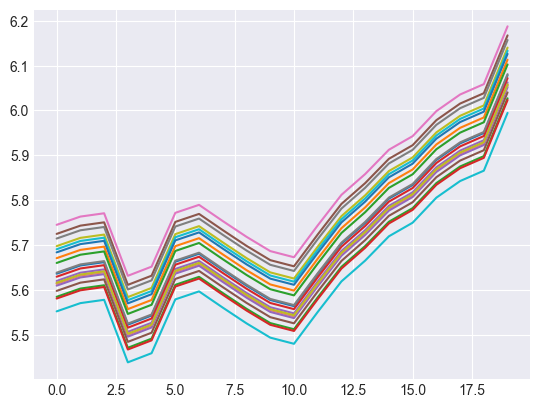

In [282]:
OD2_spec = result_OD2_spec[1,:] - result_OD1_spec[0,:]
for i in range(20):
    # OD2_spec[i*20:i*20+20] = (OD2_spec[i*20:i*20+20] - OD2_spec[i*20:i*20+20].mean()) / (OD2_spec[i*20:i*20+20].max() - OD2_spec[i*20:i*20+20].min())
    plt.plot(OD2_spec[i*20:i*20+20], label=i)
plt.show()

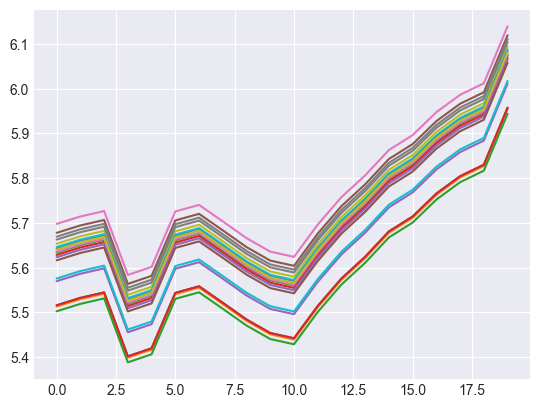

In [294]:
OD2_spec = result_OD2_spec[10,:] - result_OD1_spec[0,:]
for i in range(20):
    # OD2_spec[i*20:i*20+20] = (OD2_spec[i*20:i*20+20] - OD2_spec[i*20:i*20+20].mean()) / (OD2_spec[i*20:i*20+20].max() - OD2_spec[i*20:i*20+20].min())
    plt.plot(OD2_spec[i*20:i*20+20], label=i)
plt.show()

In [180]:
np.save(os.path.join('dataset','result_OD1_spec.npy'), result_OD1_spec)
np.save(os.path.join('dataset','result_OD2_spec.npy'), result_OD2_spec)

In [295]:
len(total_predict)

84

In [296]:
result_OD2_spec.shape

(84, 800)

In [332]:
total_predict

[0.0011355206370353699,
 -0.005081780254840851,
 -0.011320210993289948,
 0.012974970042705536,
 -0.022290296852588654,
 0.0037321075797080994,
 0.0128244087100029,
 -0.03139079362154007,
 0.01794840395450592,
 0.021829426288604736,
 -0.028225921094417572,
 -0.0020132511854171753,
 0.013173654675483704,
 -0.020299509167671204,
 0.016688399016857147,
 -0.02162381261587143,
 -0.005507864058017731,
 -0.012211032211780548,
 0.019680045545101166,
 -0.032325975596904755,
 -0.018186554312705994,
 0.015160225331783295,
 -0.002445325255393982,
 -0.026151366531848907,
 0.00957394391298294,
 0.021366186439990997,
 -0.012201406061649323,
 0.003134883940219879,
 0.0039376020431518555,
 -0.007907114923000336,
 -0.014527231454849243,
 -0.015111573040485382,
 -0.01018773764371872,
 0.006266385316848755,
 -0.004593558609485626,
 -0.008767850697040558,
 -0.023816265165805817,
 0.01056601107120514,
 -0.008070603013038635,
 0.011817753314971924,
 -0.028610683977603912,
 -0.02370121330022812,
 0.01275140047

In [342]:
total_predict = np.array(total_predict)*100


In [343]:
# moving avg
before_moving = total_predict.copy()
def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
avg_points = 3
total_predict[avg_points - 1:] = moving_average(total_predict, n = avg_points)
# using_time = using_time[avg_points-1:]
total_predict

array([ 0.11355206, -0.50817803, -0.50888235, -0.11423404, -0.68785126,
       -0.18610731, -0.19112602, -0.49447591, -0.02059937,  0.27956789,
        0.38506364, -0.28032487, -0.56885059, -0.30463686,  0.31875148,
       -0.84116409, -0.34810926, -1.31142363,  0.06537164, -0.82856541,
       -1.02774948, -1.17841015, -0.18238847, -0.44788222, -0.6340916 ,
        0.15962546,  0.62462414,  0.40998881, -0.170964  , -0.02782096,
       -0.61655814, -1.25153065, -1.3275514 , -0.63443085, -0.28383036,
       -0.2365008 , -1.23925582, -0.73393683, -0.71069524,  0.47710538,
       -0.82878446, -1.3498048 , -1.31868323, -0.60931544,  0.26098713,
       -0.4898419 , -0.85328023, -1.97151676, -1.54007922, -1.72878007,
       -0.39751828,  0.4404602 ,  2.25836784,  1.90945814,  0.89303454,
       -0.02554084, -0.39148976,  0.86349472,  0.25414949,  0.33582499,
        0.13398578,  0.66329638,  0.92252642,  0.0941587 ,  0.73376944,
        0.85926354,  0.23476382, -0.47616189, -0.34110621,  0.56

In [186]:
# RMSE = np.sqrt(np.mean(np.square(np.array(total_predict[:125])*100)))
# RMSE

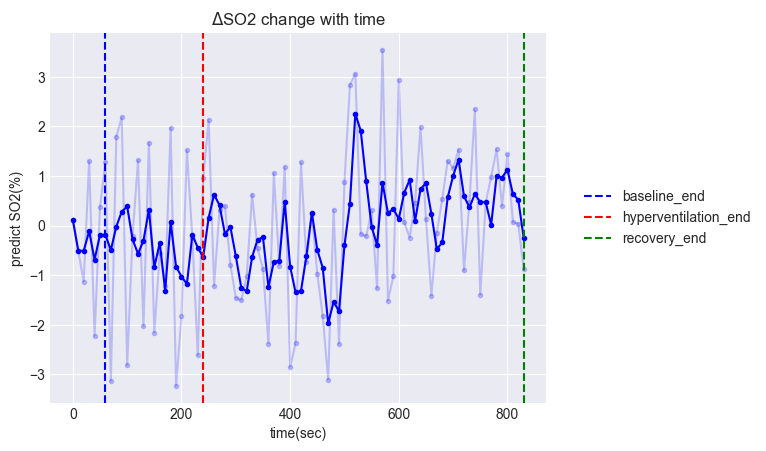

In [344]:
plt.plot(using_time, total_predict, "b.-")
plt.plot(using_time, before_moving, "b.-", alpha=0.2)
plt.axvline(x=60, linestyle='--', color='b', label='baseline_end')
plt.axvline(x=240, linestyle='--', color='r', label='hyperventilation_end')
plt.axvline(x=using_time[-1], linestyle='--', color='g', label='recovery_end')
plt.xlabel("time(sec)")
plt.ylabel("predict SO2(%)")
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),
          fancybox=True, shadow=True)
plt.title(f'$\Delta$SO2 change with time')
plt.savefig(os.path.join('pic', 'SO2_change_with_time.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()

In [345]:
accumulate_predict = []
baseline = total_predict[0]
accumulate = total_predict[0]
accumulate_predict += [accumulate]
for p in total_predict[1:]:
    accumulate += p 
    accumulate_predict += [accumulate]
accumulate_predict

# total_predict = []
# using_time = []
# baseline_time = [i for i in range(0,50,10)]
# HP_time = [i for i in range(70,230,10)]
# recovery_time = [i for i in range(250,420,10)]
# total_time = baseline_time + HP_time + recovery_time
# for idx, time in enumerate(range(0,390,10)):
#     using_time += [time]
#     OD1_spec = get_OD(used_wl_data, used_wl_data2, time=0)
#     OD2_spec = get_OD(used_wl_data, used_wl_data2, time=time+10)
#     if idx == 0:
#         result_OD1_spec = OD1_spec.reshape(1,-1)
#         result_OD2_spec = OD2_spec.reshape(1,-1)
#     else:
#         result_OD1_spec = np.concatenate((result_OD1_spec, OD1_spec.reshape(1,-1)))
#         result_OD2_spec = np.concatenate((result_OD2_spec, OD2_spec.reshape(1,-1)))
#     delta_OD = OD2_spec - OD1_spec
#     model_input = torch.tensor(delta_OD)
#     model_input = model_input.to(torch.float32).cuda()
#     predict = model(model_input)
#     total_predict += [predict.item()]
# total_predict = np.array(total_predict)*100
# accumulate_predict = total_predict

[0.11355206370353699,
 -0.3946259617805481,
 -0.903508315483729,
 -1.017742355664571,
 -1.70559361577034,
 -1.8917009234428406,
 -2.082826942205429,
 -2.577302853266398,
 -2.597902218500773,
 -2.3183343311150866,
 -1.9332706928253172,
 -2.213595559199651,
 -2.782446146011352,
 -3.087083001931508,
 -2.768331517775853,
 -3.6094956099987026,
 -3.957604865233103,
 -5.2690284947554265,
 -5.20365685224533,
 -6.0322222610314675,
 -7.059971739848454,
 -8.238381892442701,
 -8.420770366986591,
 -8.868652582168577,
 -9.502744177977242,
 -9.343118717273073,
 -8.71849457422892,
 -8.308505763610201,
 -8.479469766219454,
 -8.507290730873741,
 -9.123848875363665,
 -10.375379522641497,
 -11.702930927276608,
 -12.33736177285512,
 -12.621192137400307,
 -12.857692937056221,
 -14.096948752800621,
 -14.830885579188662,
 -15.541580816109972,
 -15.064475437005358,
 -15.893259892861046,
 -17.24306469162305,
 -18.56174791852633,
 -19.171063353617985,
 -18.91007622083028,
 -19.399918119112648,
 -20.2531983455022

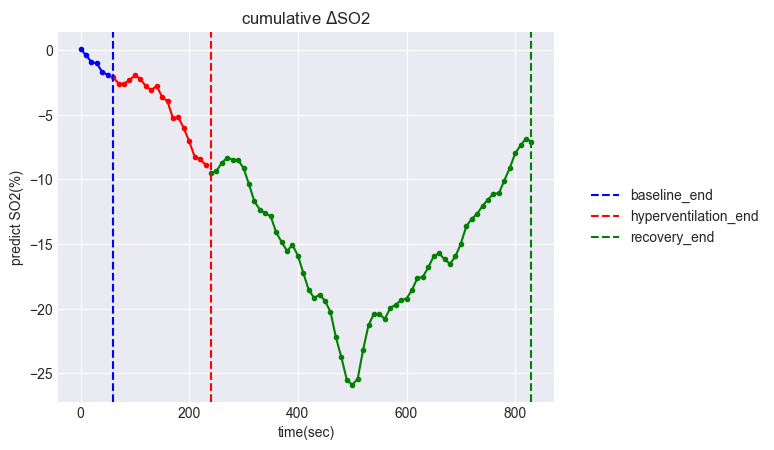

In [346]:
plt.plot(using_time[:6], accumulate_predict[:6], "b.-")
plt.plot(using_time[6:24], accumulate_predict[6:24], "r.-")
plt.plot(using_time[24:], accumulate_predict[24:], "g.-")
plt.axvline(x=60, linestyle='--', color='b', label='baseline_end')
plt.axvline(x=240, linestyle='--', color='r', label='hyperventilation_end')
plt.axvline(x=using_time[-1], linestyle='--', color='g', label='recovery_end')
plt.xlabel("time(sec)")
plt.ylabel("predict SO2(%)")
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5),
          fancybox=True, shadow=True)
plt.title(f'cumulative $\Delta$SO2')
plt.savefig(os.path.join('pic', 'SO2_cumulative.png'), dpi=300, format='png', bbox_inches='tight')
plt.show()